## CO2 EMISSIONS PROJECT

#### PROBLEM STATEMENT :

Global warming is one of the biggest challenges currently being faced by the human race, although correlation is not causation a likely cause of global warming is due to increased atmospheric 
CO2 emissions is to predict the amount of CO2 emissions that will be produced by a vehicle based on its characteristics such as engine size, fuel type, and transmission type.

The dataset contains information about various cars such as make, model, year, engine size, fuel type, and CO2 emissions. The goal is to build a machine learning model that can accurately predict the amount of CO2 emissions produced by a vehicle based on its characteristics.
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features.

There are total 7385 Rows and 12 Columns.

### METHODS FOR BUILDING MODEL:

To build a model to predict CO2 Emission by Vehicles, following steps are performed.

Importing Dataset
->Preprocessing Dataset
->Data Analysis
->Analysis Conclusion
->Training model
->Building Model

TOOLS & TECHNOLOTIES USED :

=> Python Language/Libraries:
=> Numpy
=> Pandas
=> Seaborn
=> Machine Learning Algorithms


# DETAILS OF DESCRET FEATURES : 

MODEL:

4WD/4X4 = Four-wheel drive, 

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase



FUEL TYPE:

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas


FUEL CONSUMPTION: 
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

CO2 EMISSIONS :
    
The tailpipe emissions of carbon dioxide (in grams per kelometre) for combined city and highway driving.

In [2]:
# Important Libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
# IMPPORTED DATASET:

In [4]:
df=pd.read_csv('CO2 Emissions.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Shape of dataset :

# 7385 rows and 12 columns

df.shape

(7385, 12)

In [6]:
# TO check Duplicate values

df.duplicated().sum()

1103

In [7]:
duplicate=df.drop_duplicates(inplace=True)

We have drop duplicate values which are not effected on model

In [8]:
# Now we have only 6282 rows

df.shape

(6282, 12)

In [9]:
# Short Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

Here we have total no. of entries. 
No Null/Missing values in dataset. 
Also have the data type of all features (object, int, float)

### Data Analysis

#### Missing Values

In [10]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [11]:
# No Missing values in Dataset

In [12]:
# Data Description:

df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [13]:
# We have describe Whole data here, 
# Here we can get description of every features like (count, mean, median, min, max, standard deviation etc.)

### Now We are spliting numeric features and Discrete features

### Numeric Features

In [14]:
num_features = df.select_dtypes(include=['int64','float64'])

In [15]:
# Here we get a all numerical features from dataset

num_features.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


### Discrete Features

In [16]:
# For having Discrete features from table: 

dis_features = df.select_dtypes(include=['object'])

In [17]:
dis_features

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


### Numeric/continues Features

In [91]:
# Now we will analysis the continuous featurs by using distrubutin plot, barplot etc.

In [24]:
# This is our numeric features

num_features.dtypes

Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [18]:
# There are 8 type of Cylinders in Vehicles And their vehicles counts :

aa=df['Cylinders'].value_counts()
aa

4     2749
6     2040
8     1202
12     135
3       88
10      40
5       26
16       2
Name: Cylinders, dtype: int64

In [19]:
# Here we have comparing Cylinder type and No. of total cylinder according cylinder type

x=np.array([4,6,8,12,3,10,5,16])
y=np.array([3220,2446,1402,151,95,42,26,3])
a=pd.DataFrame(y,columns=['counts'])
b=pd.DataFrame(x,columns=['Cylinders'])
print(a)
print(b)

   counts
0    3220
1    2446
2    1402
3     151
4      95
5      42
6      26
7       3
   Cylinders
0          4
1          6
2          8
3         12
4          3
5         10
6          5
7         16


In [20]:
# We have stored it in one DataFrame for simplicity

DF=pd.concat([a,b],axis=1)
DF

,counts,Cylinders
0,3220,4
1,2446,6
2,1402,8
3,151,12
4,95,3
5,42,10
6,26,5
7,3,16


### Cylinders usage in percentage wise. 

4=>  (3200/7385*100)   = 43.33 %

6=>  (2446/7385*100)   = 33.12 %

8=>  (1402/7385*100)   = 18.98 %

12=> (151/7385*100)    = 02.04 %

3=>  (95/7385*100)     = 01.28 %

10=> (42/7385*100)     = 00.56 %

5=>  (26/7385*100)     = 00.35 %

16=> (3/7385*100)      = 00.35 %


<AxesSubplot:xlabel='Cylinders', ylabel='counts'>

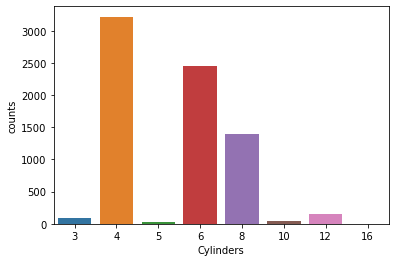

In [21]:
# Feature Analysis of Cylinders :
sns.barplot(x='Cylinders',y='counts', data=DF)

# Observation:

There are 3 cylinder types whose usage is very high.

Majority of the cars have 4 Cylinders (43%), followed by 6 cylinders(33%)

and 8 cylinders(18%)

hese Vehicals counts 94.7 % of total CO2 Emissions

#### Here we noticed, Most of the  4, 6, 8 Cylinders  are using in vehicles.

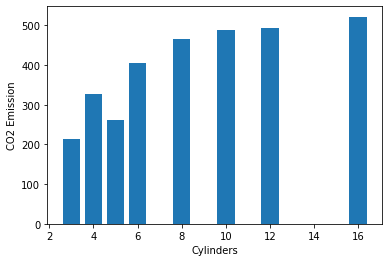

In [22]:
# We have compared 'Cylinders' and 'CO2 Emissions'

plt.bar(df['Cylinders'],df['CO2 Emissions(g/km)'])
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')

plt.show()

#### Observations:
Emission increases as nnumber of cylinders increases

#### Distribution

In [25]:
# Here we can check the distribution of Engine Size

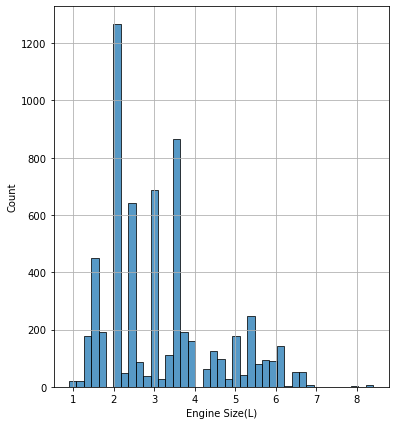

In [26]:
plt.figure(figsize=(6,7))
sns.histplot(df['Engine Size(L)'])
plt.grid()

plt.show()

#### OBSERVATION:
Here, We can noticed Engine size of 2 is highly using in vehicles. Basically engine 2,3,4 are widly using in vehicles.

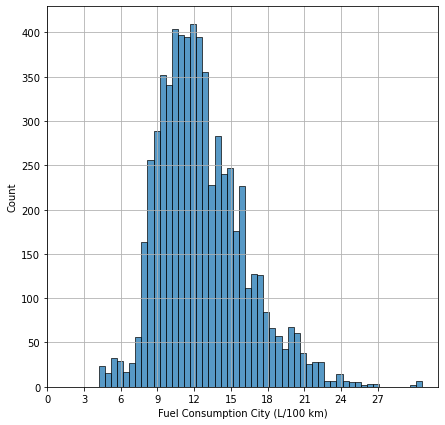

In [27]:
plt.figure(figsize=(7,7))
sns.histplot(df['Fuel Consumption City (L/100 km)']) 
plt.xticks(range(0,30,3))
plt.grid()

plt.show()

#### Observation

Cars are consuming more fuel (around 6 to 21) in city/Trafic area

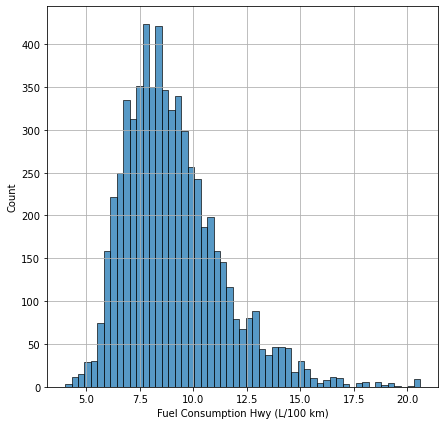

In [28]:
plt.figure(figsize=(7,7))
sns.histplot(df['Fuel Consumption Hwy (L/100 km)'])           
plt.grid()

plt.show()

#### Observation

Cars are consuming around 5 to 15 liter fuel on Highway/open area

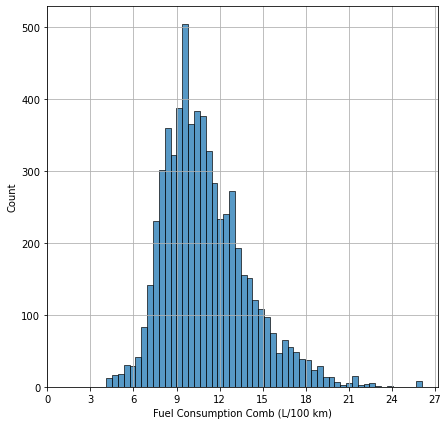

In [29]:
plt.figure(figsize=(7,7))
sns.histplot(df['Fuel Consumption Comb (L/100 km)'])    
plt.xticks(range(0,30,3))
plt.grid()

plt.show()

#### Observation

Here Vehicles are consuming around 6 to 18 liter Fuel on Highway & city comb

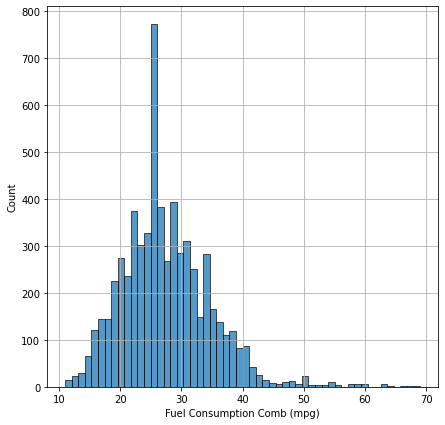

In [30]:
plt.figure(figsize=(7,7))
sns.histplot(df['Fuel Consumption Comb (mpg)'])           
plt.grid()

plt.show()

#### Conclusion


Fuel Consumption in city, highway, comb we have observed through plot. 
According to visualization can observed:-
Continuous Features are slightly Left skewed.

### Relationship with target variable 

In [31]:
df.corr()             # Co-relation with Output feature

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


In [32]:
# Visualization of Relationship by using heatmap

<AxesSubplot:>

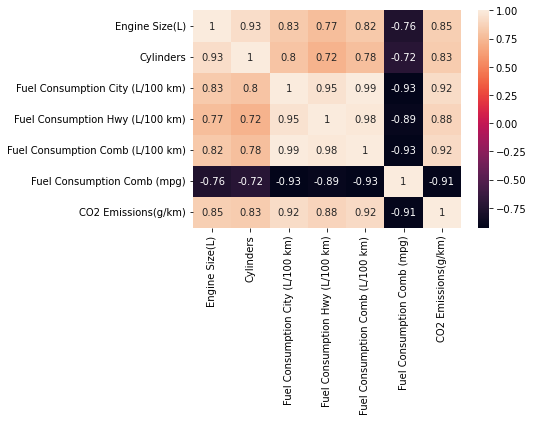

In [33]:
sns.heatmap(df.corr(),annot=True)

Every input features are highly Co-related with output features

In [34]:
# Here we are seperately check corelation with every input features and output features

# So that we have used loop here,
# Here we used for loop for having relation with target.

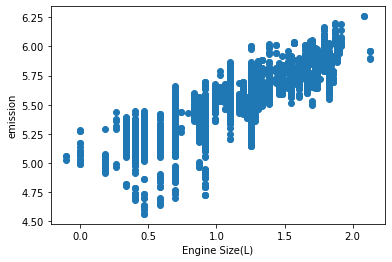

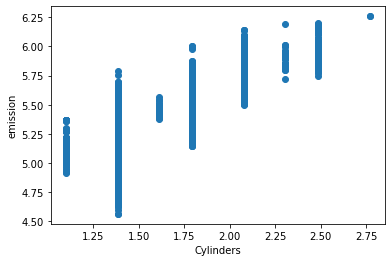

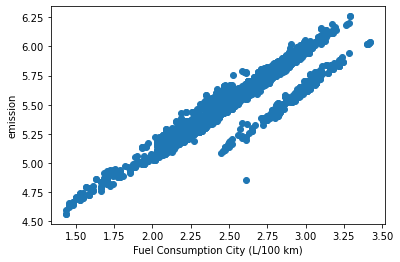

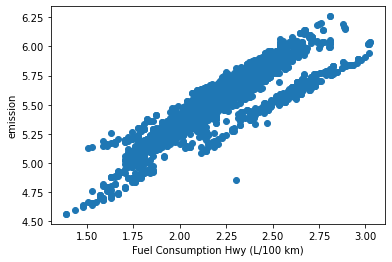

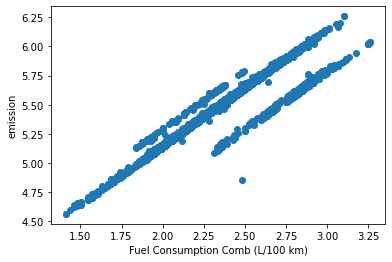

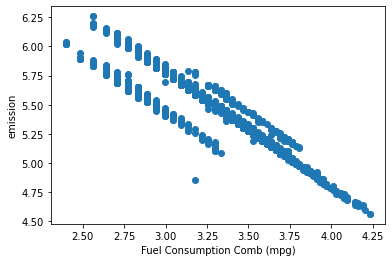

In [35]:
for i in num_features:
    if i != 'CO2 Emissions(g/km)':
        data=df.copy()
        
        data[i]=np.log(data[i])
        
        plt.scatter(data[i], np.log(data['CO2 Emissions(g/km)']))
        
        plt.xlabel(i)
        plt.ylabel('emission')
        
        plt.show()

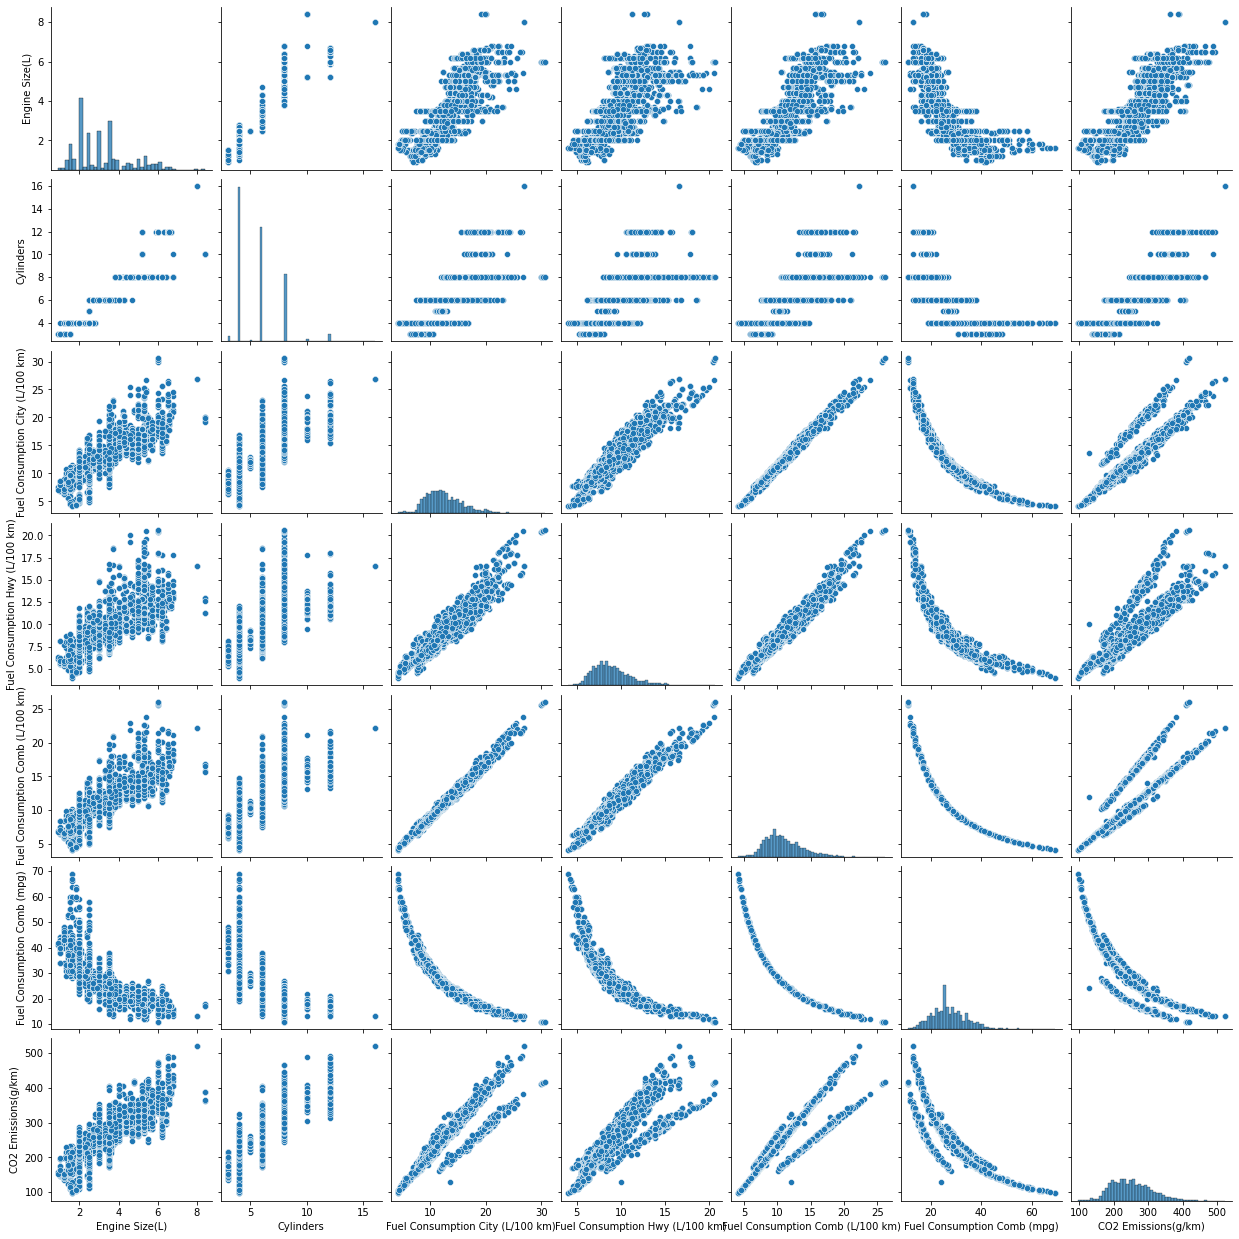

In [36]:
# WE can use pairplot also for checking relationship between featurs.
sns.pairplot(num_features)

#### Observation:

1. Emission increases with increase in engine size
2. Emission increases with increase in Fuel Consumption (city, Hwy, Comb(L.100kg))
3. Emission decreases with increase in Fuel Consumption Comb(mpg)

According to Pairplot Data is linearly seperated

### Outliers Remove/Detection

In [37]:
# Outliers are those data points which are significantly different from other data points in a dataset.
# It can skew the results of a model.

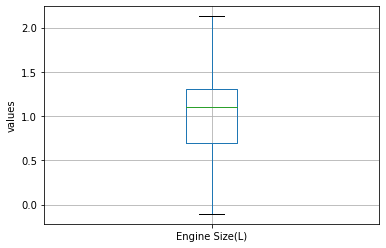

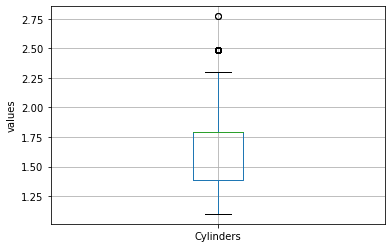

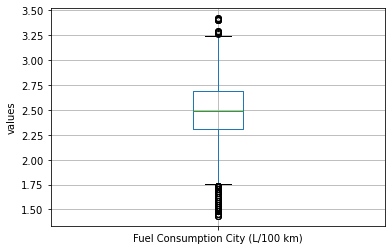

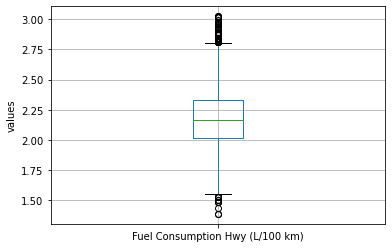

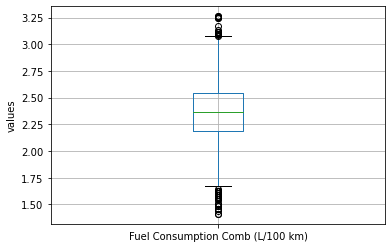

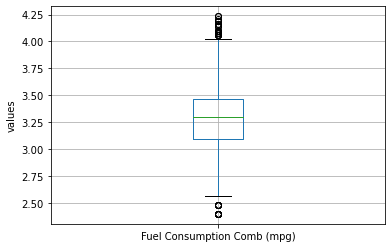

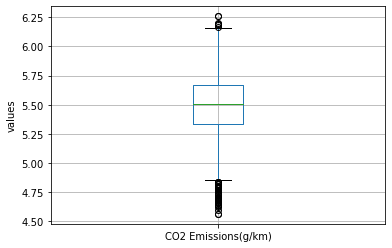

In [38]:
for i in num_features:
    data=df.copy()
    
    data[i]=np.log(data[i])
    data.boxplot(column=i)
    plt.ylabel('values')
    plt.show()

In [39]:
# For Removing outliers we have techniques: 1. IQR  2. Z-score

### Categorical Features

In [40]:
dis_features

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [41]:
# Total  42 classes in 'Make' column

df['Make'].value_counts().count()

42

In [42]:
# Total 16 Classes in 'Vehical Class' column

df['Vehicle Class'].value_counts().count()

16

In [43]:
# Total 27 classes in 'Transmission' column

df['Transmission'].value_counts().count()

27

In [44]:
# Total 5 Classes in 'Fuel Type'

df['Fuel Type'].value_counts().count()

5

#### Observation of Categorical features

Make : 42 categories

Model : 2053 categories

Vehicle Class : 16 categories

Transmission : 27 categories

Fuel type 5 categories

 We can drop 'model' feature as 'make' will provide an overview on the specifications

In [45]:
# Here we have dropped 'Model' column.

dis_features.drop('Model',axis=1, inplace=True)

In [46]:
dis_features

,Make,Vehicle Class,Transmission,Fuel Type
0,ACURA,COMPACT,AS5,Z
1,ACURA,COMPACT,M6,Z
2,ACURA,COMPACT,AV7,Z
3,ACURA,SUV - SMALL,AS6,Z
4,ACURA,SUV - SMALL,AS6,Z
...,...,...,...,...
7380,VOLVO,SUV - SMALL,AS8,Z
7381,VOLVO,SUV - SMALL,AS8,Z
7382,VOLVO,SUV - SMALL,AS8,Z
7383,VOLVO,SUV - STANDARD,AS8,Z


In [47]:
# Relationshiop with Target column

# After checking relationship we can decide whether remove column or keep as it is

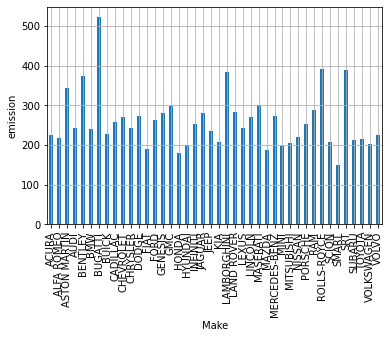

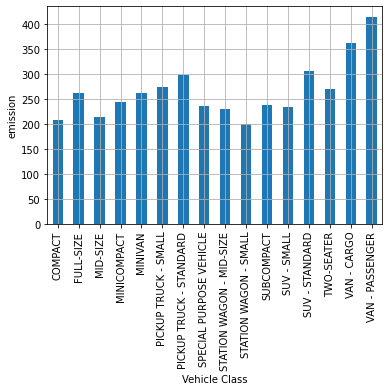

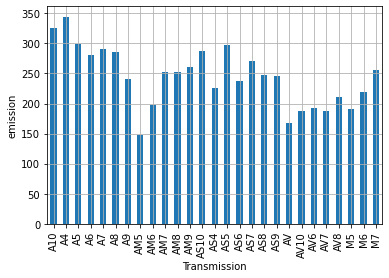

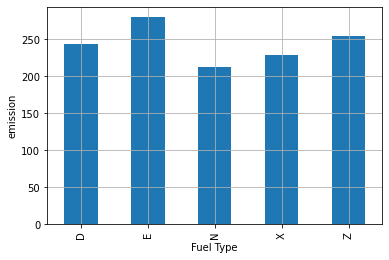

In [48]:
for i in dis_features:
    data=df.copy()
    
    data.groupby(i)['CO2 Emissions(g/km)'].median().plot.bar()
    
    plt.xlabel(i)
    plt.ylabel('emission')
    plt.grid()
    plt.show()

#### Observations:

1. Bugatti, Lamborghini & Rolls royce has the highest emission
2. Vans (Cargo and Passenger) have the highest emission
3. AM5 and AV engines have relatively lowest emission
4. E > Z > D > X > N Fuel type Emission Rate 

### Feature Engineering

In [49]:
dis_features.head()

,Make,Vehicle Class,Transmission,Fuel Type
0,ACURA,COMPACT,AS5,Z
1,ACURA,COMPACT,M6,Z
2,ACURA,COMPACT,AV7,Z
3,ACURA,SUV - SMALL,AS6,Z
4,ACURA,SUV - SMALL,AS6,Z


### Convert Categorical features to Numerical features

 Each categorical features has a strong relationship with Emission we should use ordinal encodin

In [50]:
dis_features.head()

,Make,Vehicle Class,Transmission,Fuel Type
0,ACURA,COMPACT,AS5,Z
1,ACURA,COMPACT,M6,Z
2,ACURA,COMPACT,AV7,Z
3,ACURA,SUV - SMALL,AS6,Z
4,ACURA,SUV - SMALL,AS6,Z


In [51]:
from sklearn.preprocessing import LabelEncoder

Or=LabelEncoder()

In [52]:
dis_features[['Make','Vehicle Class','Transmission','Fuel Type']]=dis_features[['Make','Vehicle Class','Transmission','Fuel Type']].apply(LabelEncoder().fit_transform)                             

In [53]:
dis_features

,Make,Vehicle Class,Transmission,Fuel Type
0,0,0,14,4
1,0,0,25,4
2,0,0,22,4
3,0,11,15,4
4,0,11,15,4
...,...,...,...,...
7380,41,11,17,4
7381,41,11,17,4
7382,41,11,17,4
7383,41,12,17,4


We Have successfully converted categorical features into numerical features

In [54]:
# Here We have combined Numerical columns and categorical columns which we have divided for simplicity

In [55]:
dataset=pd.concat([dis_features,num_features],axis=1)

In [56]:
dataset

,Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,14,4,2.0,4,9.9,6.7,8.5,33,196
1,0,0,25,4,2.4,4,11.2,7.7,9.6,29,221
2,0,0,22,4,1.5,4,6.0,5.8,5.9,48,136
3,0,11,15,4,3.5,6,12.7,9.1,11.1,25,255
4,0,11,15,4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,41,11,17,4,2.0,4,10.7,7.7,9.4,30,219
7381,41,11,17,4,2.0,4,11.2,8.3,9.9,29,232
7382,41,11,17,4,2.0,4,11.7,8.6,10.3,27,240
7383,41,12,17,4,2.0,4,11.2,8.3,9.9,29,232


### SEPERATION X, Y

In [57]:
# X must be 2D [DataFrame] format.
# y must be 1D [Array] format. 

In [58]:
X=dataset.drop('CO2 Emissions(g/km)',axis=1)    

y=dataset['CO2 Emissions(g/km)']                 

In [59]:
X.head()

,Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0,0,14,4,2.0,4,9.9,6.7,8.5,33
1,0,0,25,4,2.4,4,11.2,7.7,9.6,29
2,0,0,22,4,1.5,4,6.0,5.8,5.9,48
3,0,11,15,4,3.5,6,12.7,9.1,11.1,25
4,0,11,15,4,3.5,6,12.1,8.7,10.6,27


In [60]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

### Feature Scaling

In [61]:
# Here we have scalled our data by using Normalization Technique(MinMaxScaler)

In [62]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [63]:
X_mm=mm.fit_transform(X)

In [64]:
print(X_mm)         # We have scalled our input features(X)

[[0.         0.         0.53846154 ... 0.1626506  0.2        0.37931034]
 [0.         0.         0.96153846 ... 0.22289157 0.25       0.31034483]
 [0.         0.         0.84615385 ... 0.10843373 0.08181818 0.63793103]
 ...
 [1.         0.73333333 0.65384615 ... 0.27710843 0.28181818 0.27586207]
 [1.         0.8        0.65384615 ... 0.25903614 0.26363636 0.31034483]
 [1.         0.8        0.65384615 ... 0.28313253 0.3        0.25862069]]


#### We have finished EDA 

### Cross validation 

In [65]:
# We have splitted data into 'training' and 'testing' part

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(X_mm,y, test_size=0.2, random_state=11)

In [68]:
print(xtrain.shape)    # Checked shape of xtrain,xtest
print(xtest.shape)

(5025, 10)
(1257, 10)


In [69]:
print(ytrain.shape)    # Checked shape of ytrain,ytest
print(ytest.shape)

(5025,)
(1257,)


## Model Building

Now we will build model by using different Machine Learning Algorithms
and apply this algorithm which will perform better than other algorithms.

We can apply Linear Regression, Ridge, Lasso, Random Forest, KNN, DT algorithms etc. 
we will use that algorithm which will give best Accuracy.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [71]:
# Object Created

lr=LinearRegression()
rd=Ridge()
ls=Lasso()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()

In [72]:
# Imoprted libreries for checking error rate
# Here 

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print('Mean Absolute Error : ',mean_absolute_error(ytest,ypred))
    
    print('Mean Squared Error : ',mean_squared_error(ytest,ypred))
    
    print('Training accuracy : ',model.score(xtrain,ytrain))
    
    print('Testing Accuracy : ',model.score(xtest,ytest))
    
    print('Final Accuracy Score : ', r2_score(ytest,ypred))
          
    return model

In [75]:
# Performance of Linear Regression

print(mymodel(lr))          

Mean Absolute Error :  11.292049300894487
Mean Squared Error :  293.2954155067419
Training accuracy :  0.9152760246223939
Testing Accuracy :  0.9180843764271178
Final Accuracy Score :  0.9180843764271178
LinearRegression()


In [76]:
# Performance of Ridge Regression:

print(mymodel(rd))

Mean Absolute Error :  11.296049298850013
Mean Squared Error :  292.59415770530853
Training accuracy :  0.9152040214898418
Testing Accuracy :  0.9182802334608547
Final Accuracy Score :  0.9182802334608547
Ridge()


In [77]:
# Performance of Lasso Regression:

print(mymodel(ls))

Mean Absolute Error :  14.609560630023037
Mean Squared Error :  420.8045374576533
Training accuracy :  0.8843581456766426
Testing Accuracy :  0.8824718551137751
Final Accuracy Score :  0.8824718551137751
Lasso()


In [78]:
# Performance of KNN

print(mymodel(knn))

Mean Absolute Error :  5.530151153540174
Mean Squared Error :  64.36941925218775
Training accuracy :  0.9869973739397659
Testing Accuracy :  0.982022013170724
Final Accuracy Score :  0.982022013170724
KNeighborsRegressor()


In [79]:
# Performance of Decision Tree

print(mymodel(dt))

Mean Absolute Error :  2.029238171004281
Mean Squared Error :  11.748500875821026
Training accuracy :  0.9996805669421572
Testing Accuracy :  0.9967187152461054
Final Accuracy Score :  0.9967187152461054
DecisionTreeRegressor()


In [80]:
# Performance of Random Forest

print(mymodel(rf))

Mean Absolute Error :  2.031097982146908
Mean Squared Error :  11.478393314362895
Training accuracy :  0.9993458758707779
Testing Accuracy :  0.9967941546432415
Final Accuracy Score :  0.9967941546432415
RandomForestRegressor()


#### We got highest Accuracy on Random Forest

Here we got 99% Final Accuracy on Random Forest and it is good to prediction.

In [81]:
# Here We Compared actual data and predicted Data and find out Error/Loss

In [82]:
ypred=rf.predict(xtest)

In [83]:
# TO Compare 'Actual' Values and 'Predicted' Values

In [84]:
Actual=pd.DataFrame(ytest)
Actual

,CO2 Emissions(g/km)
7206,191
2175,182
6081,214
463,209
3062,214
...,...
3108,255
2139,163
7026,241
6097,289


In [85]:
Predicted=pd.DataFrame(ypred,columns=['predicted'])
Predicted

,predicted
0,188.819976
1,180.280000
2,212.933000
3,212.080893
4,216.580833
...,...
1252,253.179333
1253,164.630000
1254,241.470000
1255,288.690000


In [86]:
print('Mean Square Error :',mean_squared_error(Actual,Predicted))       # Squared Error
print('Mean Absolute Error :',mean_absolute_error(Actual,Predicted))    # Absolute Error

print('Final Accuracy :',r2_score(Actual,Predicted))                    # Final Accuaray

Mean Square Error : 11.478393314362895
Mean Absolute Error : 2.031097982146908
Final Accuracy : 0.9967941546432415


After comparing actual and predicted data we got Absolute_Error, Square_Error and Final_Accuracy

Here We find Error/loss to comparing actual values and predicted values

### Prediction on unknown datapoint by Model

In [87]:
# We have predicting for 'CO2 Emission' for bus vehicle

In [88]:
bus=np.array([[28,10,4,4,4.0,8,14.0,10.4,12.4,23]])   # Random data for bus

In [89]:
Df=pd.DataFrame(bus,columns=X.columns)         # Converted it into DataFrame
Df

,Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,28.0,10.0,4.0,4.0,4.0,8.0,14.0,10.4,12.4,23.0


In [90]:
prediction=rf.predict(Df)                    # Prediction on given unknown datapoints 
prediction

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([421.487])

### We have successfully predicted "CO2 Emission" for Bus vehicle based on our Machine Learning Model.